# Intoduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.
A classification is where you try to classify something as one thing or another.
A few types of classification problems:
* Binary classification
* Multiclass classifciation
* Multilabel classification 

## Creating Data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)
# Checkout features and labels
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

This data is hard to understan, let's visualize

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


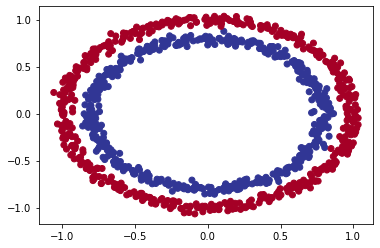

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shapes

In [11]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [12]:
# Check sample count
len(X),len(y)

(1000, 1000)

In [13]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling 
The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak 
6. Evaluate...

In [14]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.0'

In [16]:
# Set random seet
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])
# Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 871us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 839us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 839us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 903us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 839us/step - loss: 0.6942 - accuracy: 0.4820


In [18]:
# Let's improve the model by training longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 742us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since this is a binary classification problem and the model is getting ~50% accuracy it appears it is guessing at random

In [20]:
# Set the random seed
tf.random.set_seed(42)
# 1. Create the model with 2 layers this time
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])
#3. Fit the model
model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 903us/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 935us/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 871us/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 903us/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 839us/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 852us/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 904us/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 903us/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 903us/step - loss: 0.6962 - accur

32/32 [==============================] - 0s 871us/step - loss: 0.6941 - accuracy: 0.4820
Epoch 82/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4920
Epoch 83/100
32/32 [==============================] - 0s 935us/step - loss: 0.6938 - accuracy: 0.5120
Epoch 84/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6941 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4830
Epoch 86/100
32/32 [==============================] - 0s 968us/step - loss: 0.6937 - accuracy: 0.4830
Epoch 87/100
32/32 [==============================] - 0s 903us/step - loss: 0.6940 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 871us/step - loss: 0.6941 - accuracy: 0.4860
Epoch 89/100
32/32 [==============================] - 0s 903us/step - loss: 0.6943 - accuracy: 0.4910
Epoch 90/100
32/32 [==============================] - 0s 936us/step - loss: 0.6939 - accuracy: 0.4

In [21]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 819us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

Adding a single extra layer had no effect on accuracy

## Improving our model

1. Create a model - we might add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leaving it to train longer)

In [25]:
# Set random seed
tf.random.set_seed(42)
# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
# 3. Fit the model
model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.4480
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4970
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4590
Epoch 86/100
32/32 [==============================] - 0s 962us/step - loss: 0.7002 - accuracy: 0.4900
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4550
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4590
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.4750
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4620
Epoch 91/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6984 - accuracy: 0.4980
Epoch 92

In [26]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_3.predict(X)

array([[0.48793244],
       [0.558876  ],
       [0.56292844],
       [0.5705067 ],
       [0.44141144],
       [0.57388216],
       [0.5576486 ],
       [0.48246646],
       [0.4775583 ],
       [0.57502264],
       [0.514849  ],
       [0.530877  ],
       [0.56437737],
       [0.45787305],
       [0.45052725],
       [0.461299  ],
       [0.5405582 ],
       [0.4638092 ],
       [0.5479803 ],
       [0.50375676],
       [0.5063044 ],
       [0.58775455],
       [0.4590246 ],
       [0.49123323],
       [0.583216  ],
       [0.5704256 ],
       [0.55239356],
       [0.4631735 ],
       [0.45773405],
       [0.45440978],
       [0.47872233],
       [0.57856053],
       [0.5554615 ],
       [0.46339148],
       [0.45849162],
       [0.58986676],
       [0.5724737 ],
       [0.52974397],
       [0.45870548],
       [0.51092887],
       [0.49994153],
       [0.5463086 ],
       [0.51099026],
       [0.4579724 ],
       [0.5223273 ],
       [0.53888035],
       [0.44872284],
       [0.544

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and the label(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [45]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the acis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min()-0.1,X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1,X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min,y_max,100))
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis =1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

doing binary classification


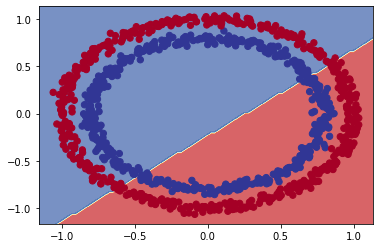

In [46]:
# Checkout the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [59]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split the data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


The model was compiled for a binary classification but this is a regression problem.
Let's change the model to suit the data

In [60]:
# Set seed
tf.random.set_seed(42)
# Create model|
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['mae'])
# Fit the model
model_4.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 1000us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 

5/5 [==============================] - 0s 1ms/step - loss: 38.6614 - mae: 38.6614
Epoch 87/100
5/5 [==============================] - 0s 1000us/step - loss: 38.8399 - mae: 38.8399
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 1ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 1000u

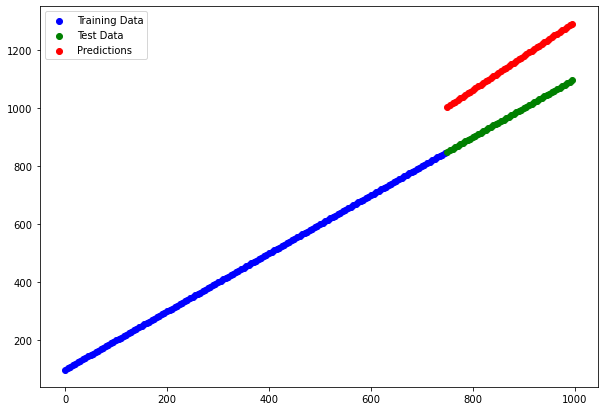

In [75]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: non-linearity 